<a href="https://colab.research.google.com/github/diyapant-max/python-foundation/blob/main/data_cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AI Impact on job market 2030

In [4]:
import pandas as pd
#Raw file URL from Github
raw_file_url = 'https://raw.githubusercontent.com/savitha14june/ai-impact-2030/refs/heads/main/AI_Impact_on_Jobs_2030.csv'

#Read csv file
df = pd.read_csv(raw_file_url)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

Data cleanup

In [5]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [6]:
#Check unique values
print(df['Job_Title'].unique())
print(df['Education_Level'].unique())
print(df['Risk_Category'].unique())

['Security Guard' 'Research Scientist' 'Construction Worker'
 'Software Engineer' 'Financial Analyst' 'AI Engineer' 'Mechanic'
 'Teacher' 'HR Specialist' 'Customer Support' 'UX Researcher' 'Lawyer'
 'Data Scientist' 'Graphic Designer' 'Retail Worker' 'Doctor'
 'Truck Driver' 'Chef' 'Nurse' 'Marketing Manager']
["Master's" 'PhD' 'High School' "Bachelor's"]
['High' 'Low' 'Medium']


In [10]:
#Write df to cleanup file
df.to_csv('ai_impact_data_cleanup.csv', index=False)

# Task
Load the cleaned data from `ai_impact_data_cleanup.csv`, then analyze and visualize the relationship between `Years_Experience` and `Automation_Probability_2030`, categorized by `Risk_Category`, and summarize the observed trends and correlations.

## Load Data

### Subtask:
Load the cleaned data from `ai_impact_data_cleanup.csv` into a pandas DataFrame.


**Reasoning**:
The subtask requires loading the cleaned data from 'ai_impact_data_cleanup.csv' into a pandas DataFrame named `df_cleaned`, displaying its first 5 rows, and printing its information. This code block will perform all these actions.



In [12]:
df_cleaned = pd.read_csv('/content/ai_impact_data_cleanup.csv')
print(df_cleaned.head())
print(df_cleaned.info())

             Job_Title  Average_Salary  Years_Experience Education_Level  \
0       Security Guard           45795                28        Master's   
1   Research Scientist          133355                20             PhD   
2  Construction Worker          146216                 2     High School   
3    Software Engineer          136530                13             PhD   
4    Financial Analyst           70397                22     High School   

   AI_Exposure_Index  Tech_Growth_Factor  Automation_Probability_2030  \
0               0.18                1.28                         0.85   
1               0.62                1.11                         0.05   
2               0.86                1.18                         0.81   
3               0.39                0.68                         0.60   
4               0.52                1.46                         0.64   

  Risk_Category  Skill_1  Skill_2  Skill_3  Skill_4  Skill_5  Skill_6  \
0          High     0.45     0.

## Analyze Risk vs. Experience

### Subtask:
Investigate the relationship between Years_Experience and Automation_Probability_2030, categorized by Risk_Category.


In [13]:
grouped_data = df_cleaned.groupby('Risk_Category')[['Years_Experience', 'Automation_Probability_2030']].mean()
print("Aggregated statistics by Risk_Category:")
print(grouped_data)

Aggregated statistics by Risk_Category:
               Years_Experience  Automation_Probability_2030
Risk_Category                                               
High                  14.497297                     0.829500
Low                   14.723951                     0.176604
Medium                14.742932                     0.499783


/tmp/ipython-input-3079083348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y='Automation_Probability_2030', data=grouped_data, ax=axes[0], palette='viridis')
/tmp/ipython-input-3079083348.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y='Years_Experience', data=grouped_data, ax=axes[1], palette='magma')


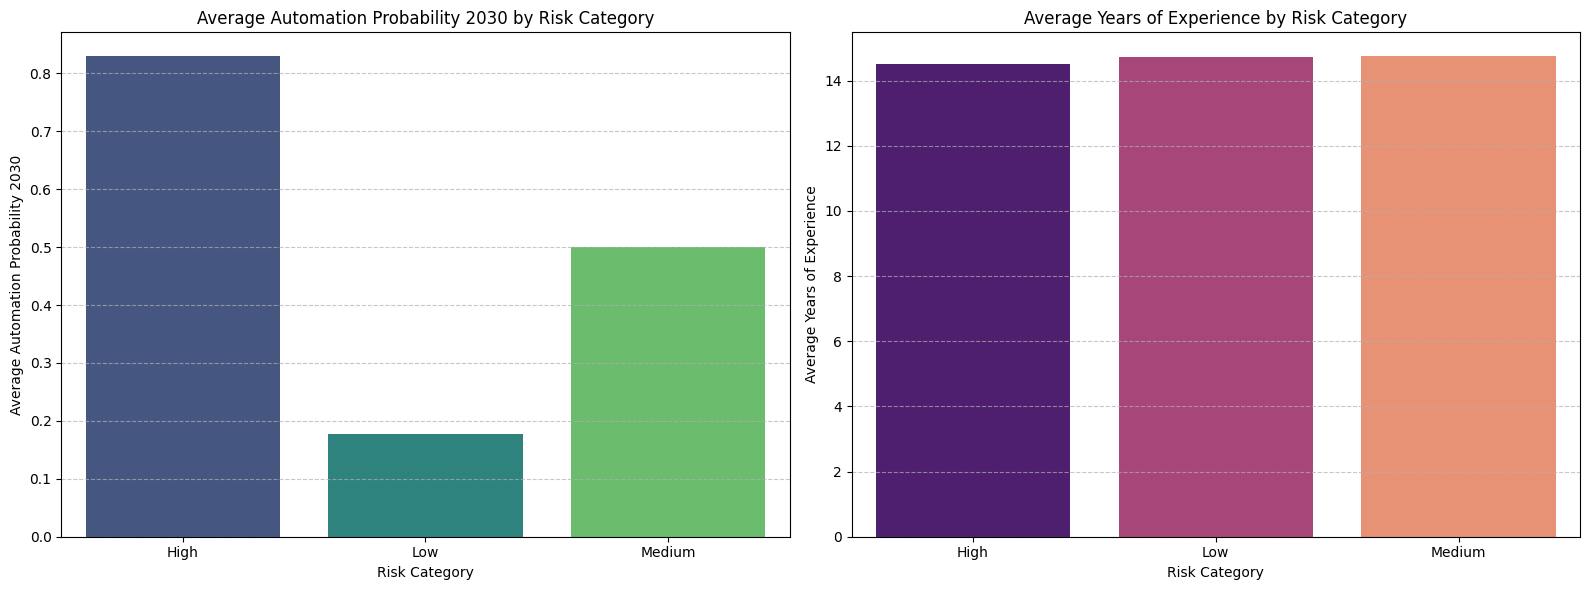

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=grouped_data.index, y='Automation_Probability_2030', data=grouped_data, ax=axes[0], palette='viridis')
axes[0].set_title('Average Automation Probability 2030 by Risk Category')
axes[0].set_xlabel('Risk Category')
axes[0].set_ylabel('Average Automation Probability 2030')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x=grouped_data.index, y='Years_Experience', data=grouped_data, ax=axes[1], palette='magma')
axes[1].set_title('Average Years of Experience by Risk Category')
axes[1].set_xlabel('Risk Category')
axes[1].set_ylabel('Average Years of Experience')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

The analysis revealed that Risk_Category is a strong predictor of Automation_Probability_2030. However, Years_Experience does not appear to have a significant direct correlation with Automation_Probability_2030, either overall or within individual Risk_Category groups.